In [43]:
import math
import random
import statistics
from typing import List

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

number_of_clusters_const = 3
points_per_cluster_const = 1000

In [44]:
def generate_landscape(number_of_clusters: int, points_per_cluster: int):
    cluster_mean_x = 100
    cluster_mean_y = 100
    cluster_deviation_x = 50
    cluster_deviation_y = 50
    point_deviation_x = 5
    point_deviation_y = 5

    axis_x = []
    axis_y = []

    for i in range(number_of_clusters):
        center_x = random.gauss(cluster_mean_x, cluster_deviation_x)
        center_y = random.gauss(cluster_mean_y, cluster_deviation_y)

        for j in range(points_per_cluster):
            axis_x.append(random.gauss(center_x, point_deviation_x))
            axis_y.append(random.gauss(center_y, point_deviation_y))

    return axis_x, axis_y

In [45]:
axis_x_result, axis_y_result = generate_landscape(number_of_clusters_const, points_per_cluster_const)
points = [list(a) for a in zip(axis_x_result, axis_y_result)]

points[:10]

[[45.854804232750276, 116.08915959279406],
 [37.4520773763187, 106.93390439272625],
 [34.997442685014015, 106.53049061014177],
 [42.484151003880434, 108.0638118225311],
 [33.40126004170127, 110.54614103814644],
 [41.67453720187167, 106.43684055648082],
 [44.94794980208529, 114.51591565487749],
 [40.99929380123278, 108.35583523981069],
 [39.36093424547843, 111.49141643897748],
 [39.54331758412187, 106.0447849287188]]

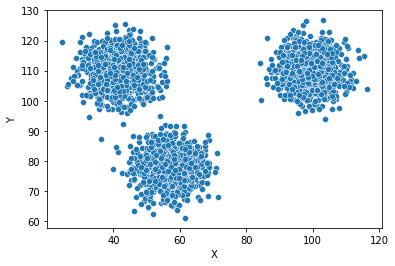

In [46]:
sns.scatterplot(x=axis_x_result, y=axis_y_result)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [47]:
def generate_random_points(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    random_x_axis: list[float] = []
    random_y_axis: list[float] = []

    for i in range(number_of_clusters):
        random_x = random.uniform(min(x_axis), max(x_axis))
        random_y = random.uniform(min(y_axis), max(y_axis))
        random_x_axis.append(random_x)
        random_y_axis.append(random_y)

    return random_x_axis, random_y_axis

def pick_random_points(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    random_x_axis: list[float] = []
    random_y_axis: list[float] = []

    for i in range(number_of_clusters):
        temp_index = random.randint(0, len(x_axis)-1)
        random_x = x_axis[temp_index]
        random_y = y_axis[temp_index]
        random_x_axis.append(random_x)
        random_y_axis.append(random_y)

    return random_x_axis, random_y_axis

def kmeans(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    diff = 1
    centroid_point_x_mapping: dict[int, list[float]] = {}
    centroid_point_y_mapping: dict[int, list[float]] = {}
    point_centroid_mapping: list[int] = [0] * len(x_axis)
    centroids_x_axis: list[float]
    centroids_y_axis: list[float]
    centroids_x_axis, centroids_y_axis = pick_random_points(number_of_clusters, x_axis, y_axis)

    random_fix_attempt = 0
    attempt = 0
    while diff:
        # for each observation
        for point_index in range(len(x_axis)):
            mean_distance = float('inf')
            point_x = x_axis[point_index]
            point_y = y_axis[point_index]

            # dist of the point from all centroids
            for centroid_index in range(len(centroids_x_axis)):
                centroid_x = centroids_x_axis[centroid_index]
                centroid_y = centroids_y_axis[centroid_index]
                distance = math.sqrt((centroid_x - point_x) ** 2 + (centroid_y - point_y) ** 2)

                # store closest centroid
                if mean_distance > distance:
                    mean_distance = distance
                    point_centroid_mapping[point_index] = centroid_index

        for point_index, centroid_index in enumerate(point_centroid_mapping):
            if centroid_index not in centroid_point_x_mapping:
                centroid_point_x_mapping[centroid_index] = []
            if centroid_index not in centroid_point_y_mapping:
                centroid_point_y_mapping[centroid_index] = []

            centroid_point_x_mapping[centroid_index].append(x_axis[point_index])
            centroid_point_y_mapping[centroid_index].append(y_axis[point_index])

        if len(centroid_point_x_mapping) != len(centroids_x_axis) and random_fix_attempt < 10:
            centroids_x_axis, centroids_y_axis = pick_random_points(number_of_clusters, x_axis, y_axis)
            random_fix_attempt += 1
            continue

        fixed_centroid = 0
        for centroid_index in range(len(centroids_x_axis)):
            if centroid_index not in centroid_point_x_mapping:
                centroid_point_x_mapping[centroid_index] = [random.uniform(min(x_axis), max(x_axis))]
            if centroid_index not in centroid_point_y_mapping:
                centroid_point_y_mapping[centroid_index] = [random.uniform(min(y_axis), max(y_axis))]

            centroid_x = centroids_x_axis[centroid_index]
            centroid_y = centroids_y_axis[centroid_index]
            new_centroid_x = statistics.mean(centroid_point_x_mapping[centroid_index])
            new_centroid_y = statistics.mean(centroid_point_y_mapping[centroid_index])

            x_diff = centroid_x - new_centroid_x
            if x_diff < 0:
                x_diff = x_diff * -1

            y_diff = centroid_y - new_centroid_y
            if y_diff < 0:
                y_diff = y_diff * -1

            if x_diff >= 0.1 or y_diff >= 0.1:
                centroids_x_axis[centroid_index] = new_centroid_x
                centroids_y_axis[centroid_index] = new_centroid_y
            else:
                fixed_centroid += 1

        if number_of_clusters == fixed_centroid or attempt == 300:
            diff = 0
        else:
            attempt += 1

    return centroids_x_axis, centroids_y_axis, point_centroid_mapping

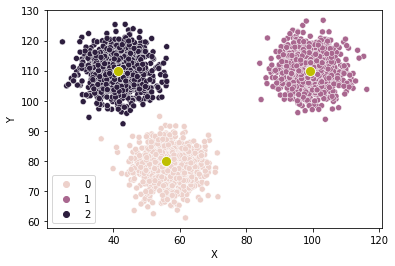

In [48]:
centroids_x_axis_result, centroids_y_axis_result, point_centroid_mapping_result = kmeans(number_of_clusters_const,
                                                                                         axis_x_result, axis_y_result)

sns.scatterplot(x=axis_x_result, y=axis_y_result, hue=point_centroid_mapping_result)
sns.scatterplot(x=centroids_x_axis_result, y=centroids_y_axis_result, s=100, color='y')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

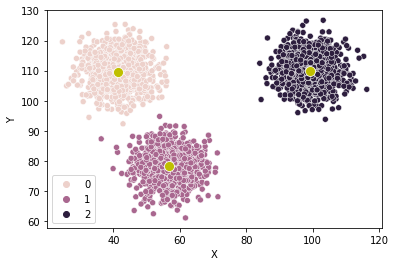

In [49]:
km = KMeans(
    n_clusters=number_of_clusters_const, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(points)

sns.scatterplot(x=axis_x_result, y=axis_y_result, hue=y_km)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s=100, color='y')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()